In [ ]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas
import seaborn as sns 
from sklearn import preprocessing
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
import re
import string
import matplotlib.cm as cm
from matplotlib import rcParams
from prettytable import PrettyTable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
cols = ['class','tweet_text']
data_positive = pd.read_csv('/content/train_Arabic_tweets_positive_20190413.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)

In [ ]:
len(data_positive)

23486

In [ ]:
positive = data_positive.drop(range(10000,23486))

In [ ]:
len(positive)

10000

In [ ]:
positive.head()

,class,tweet_text
0,pos,الي يتابعني من زمان يعرف اني ما حفزت على الحضو...
1,pos,رسميا اختربت نومتي 😀
2,pos,عيونك وطن وأكثر وطن شد انتباهي 😌
3,pos,وحده تهز 👍
4,pos,شهور الله يهديك يا حليمه لا تحطين قلوب صفراء ع...


In [ ]:
print(len(positive))

10000


# **positive Data**

In [ ]:
#Checking null values

positive[positive.isnull().any(axis=1)].head()

,class,tweet_text


In [ ]:
#Checking null values count

np.sum(positive.isnull().any(axis=1))

0

In [ ]:
positive.isnull().any(axis=0)

class         False
tweet_text    False
dtype: bool

In [ ]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       10000 non-null  object
 1   tweet_text  10000 non-null  object
dtypes: object(2)
memory usage: 234.4+ KB


# Preprocess data

In [ ]:
for letter in '…#.][!XRpos':
    positive['tweet_text'] = positive['tweet_text'].astype(str).str.replace(letter,'')

In [ ]:
# Getting Tokenize the tweet text

tokenizer = RegexpTokenizer(r'\w+')
positive["tweet_text"] = positive["tweet_text"].apply(tokenizer.tokenize)

In [ ]:
positive["tweet_text"][9]

['الهلال_والاهلي',
 'اسيست',
 'خرافي',
 'من',
 'كنو',
 'وبوتيا',
 'قرأها',
 'صح',
 'وبإذن',
 'الله',
 'الثاني',
 'قادم']

# Stop words 

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords_list = stopwords.words('arabic')

In [ ]:
stopwords_list

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [ ]:
print(len(stopwords_list))

754


In [ ]:
print(type(stopwords_list))

<class 'list'>


In [ ]:
listToStr = ' '.join([str(elem) for elem in stopwords_list]) 

In [ ]:
listToStr

'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

# Removing stop words

In [ ]:
positive["tweet_text"]=positive["tweet_text"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [ ]:
positive["tweet_text"][0]


['الي',
 'يتابعني',
 'زمان',
 'يعرف',
 'اني',
 'حفزت',
 'الحضور',
 'هالموسم',
 'ومقاطع',
 'المدرج',
 'فترة',
 'طويلة',
 'بسبب',
 'الفشل',
 'الحين',
 'اقول']

In [ ]:
# all_words = [word for tokens in positive["tweet_text"] for word in tokens]

all_words=[]
for tokens in positive["tweet_text"]:
  for word in tokens:
    all_words.append(word)

sentence_lengths = [len(tokens) for tokens in positive["tweet_text"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

96327 words total, with a vocabulary size of 27123
Max sentence length is 796


In [ ]:
print(all_words)

print(len(sentence_lengths))
print(sentence_lengths)
print(VOCAB)

['الي', 'يتابعني', 'زمان', 'يعرف', 'اني', 'حفزت', 'الحضور', 'هالموسم', 'ومقاطع', 'المدرج', 'فترة', 'طويلة', 'بسبب', 'الفشل', 'الحين', 'اقول', 'رسميا', 'اختربت', 'نومتي', 'عيونك', 'وطن', 'وأكثر', 'وطن', 'شد', 'انتباهي', 'وحده', 'تهز', 'شهور', 'الله', 'يهديك', 'حليمه', 'تحطين', 'قلوب', 'صفراء', 'اسمك', 'تذكريني', 'بهذوليك', 'وشولوه', 'تحطين', 'قلوب', 'زرقاء', 'بصوت', 'داود', 'ھادئ', 'يعآنق', 'السماء', 'امنيات', 'مسبوقه', 'كلمة', 'يآرب', 'الهلال_الاهلي', 'الف', 'الف', 'مبرووك', 'وعقيال', 'النصر', 'طبتم', 'كنتم', 'أفاض', 'الله', 'قلوبكم', 'نور', 'الرضوان', 'وعلى', 'ٲفئدتكم', 'حلاوة', 'الإيمان', 'وعلى', 'ٲجسامكم', 'عافية', 'الٲبدان', 'جميل', 'الهلال_والاهلي', 'اسيست', 'خرافي', 'كنو', 'وبوتيا', 'قرأها', 'صح', 'وبإذن', 'الله', 'الثاني', 'قادم', 'الف', 'مبروك', 'ان', 'للعطا', 'منابت', 'اراضيك', 'عنوان', 'عطاء', 'غاليتي', 'قلبي', 'عظيم', 'الامتنان', 'وجل', 'الشكر', 'الحمد', 'لله', 'كانت', 'مباراه', 'صعبه', 'بتوفيق', 'الله', 'دعمكم', 'تجاوزنا', 'المباراه', 'ابشر', 'بالعوض', 'خاطري', 'مسألة', 'وق

# top 25 words in positive

In [ ]:
counter = Counter(all_words)
print(counter)

Counter({'الله': 1915, 'اللهم': 818, 'الهلال': 544, 'الخير': 426, 'رتويت': 404, 'السحب': 372, 'لله': 351, 'يارب': 301, 'اللي': 296, 'سحب': 294, 'الحمد': 289, 'فوز': 287, 'يوم': 267, 'النصر': 252, 'انا': 248, 'بمناسبة': 239, 'ان': 232, 'ساعة': 229, 'قال': 226, 'والله': 217, 'محمد': 206, 'اليوم': 194, 'خير': 181, 'وتابع': 180, 'آيفون': 179, 'موثق': 179, 'بالفديو': 176, 'الناس': 165, 'ال': 161, 'ترى': 161, 'مبروك': 153, 'الف': 148, 'انت': 147, 'شي': 143, 'جدا': 139, 'قلبي': 136, 'شاء': 135, 'الحياة': 134, 'أجمل': 131, 'الاتحاد': 130, 'رب': 130, 'كنت': 130, 'علي': 129, 'شيء': 128, 'مش': 126, 'ضد': 126, 'كانوا': 125, 'دائما': 122, 'الدنيا': 121, 'الوحيد': 119, 'الهلال_الاهلي': 118, 'الشيء': 117, 'العظيم': 115, 'الصباح': 114, 'اي': 114, '_': 114, 'ربي': 110, 'المسيار': 110, 'الشروط': 109, 'يشجعون': 109, 'وصلوا': 108, 'للعالمية': 108, 'مدريد': 108, 'بالله': 107, 'الا': 106, 'الي': 105, 'لكل': 105, 'الحمدلله': 104, 'صباحك': 103, 'عشان': 102, 'مبرووك': 100, 'وش': 100, 'الحب': 100, 'ﷺ': 99, 'صل'

In [ ]:
counter.most_common(25)

[('الله', 1915),
 ('اللهم', 818),
 ('الهلال', 544),
 ('الخير', 426),
 ('رتويت', 404),
 ('السحب', 372),
 ('لله', 351),
 ('يارب', 301),
 ('اللي', 296),
 ('سحب', 294),
 ('الحمد', 289),
 ('فوز', 287),
 ('يوم', 267),
 ('النصر', 252),
 ('انا', 248),
 ('بمناسبة', 239),
 ('ان', 232),
 ('ساعة', 229),
 ('قال', 226),
 ('والله', 217),
 ('محمد', 206),
 ('اليوم', 194),
 ('خير', 181),
 ('وتابع', 180),
 ('آيفون', 179)]

In [ ]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

In [ ]:
print(words)
print(counts)

['الله', 'اللهم', 'الهلال', 'الخير', 'رتويت', 'السحب', 'لله', 'يارب', 'اللي', 'سحب', 'الحمد', 'فوز', 'يوم', 'النصر', 'انا', 'بمناسبة', 'ان', 'ساعة', 'قال', 'والله', 'محمد', 'اليوم', 'خير', 'وتابع', 'آيفون']
[1915, 818, 544, 426, 404, 372, 351, 301, 296, 294, 289, 287, 267, 252, 248, 239, 232, 229, 226, 217, 206, 194, 181, 180, 179]


<BarContainer object of 25 artists>

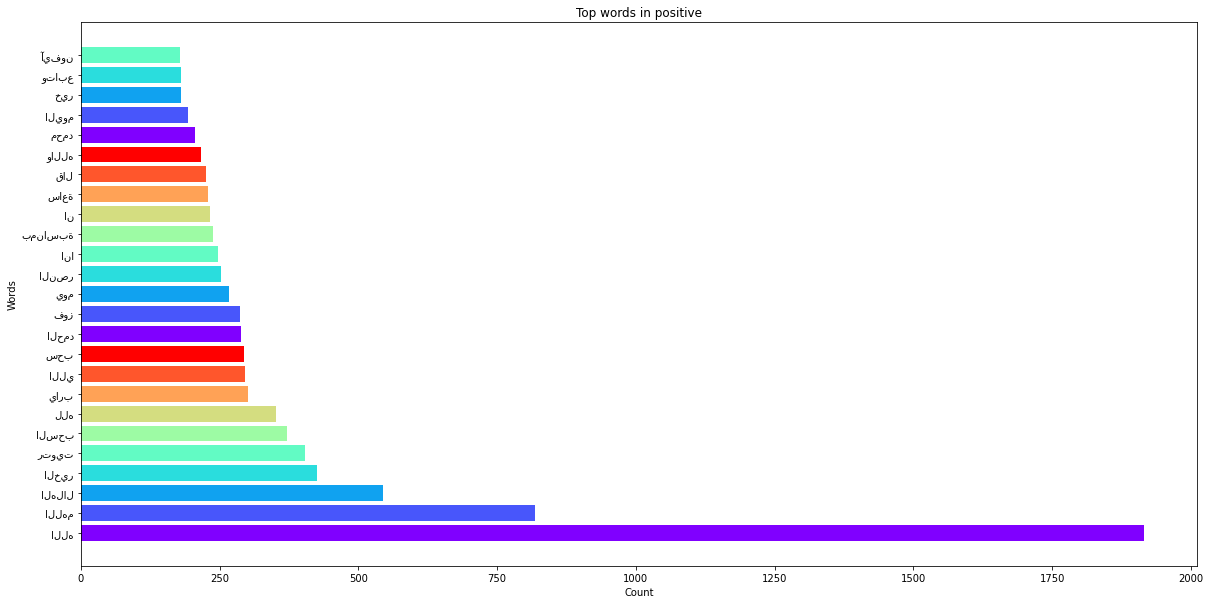

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in positive')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

# negative dataset 

*   List item
*   List item



In [ ]:
cols = ['class','tweet_text']
data_negative = pd.read_csv('/content/train_Arabic_tweets_negative_20190413.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)

In [ ]:
len(data_negative)

23933

In [ ]:
negative = data_negative.drop(range(10000,23933))

In [ ]:
len(negative)

10000

# showing top 5 records

In [ ]:
negative.head()

,class,tweet_text
0,neg,لا يغرك سكوتي ترا البعد ماينطاق الدمع بلل خدود...
1,neg,أشجار جزيرة سقطرى العجيبه والفريدة من نوعها، ي...
2,neg,أشين انواع الزعل أنك تزعل ومحد درى عنك 🙄 يعني ...
3,neg,كذا بنفقد الاطراف في الهجوم 💔
4,neg,…


# Checking null values

In [ ]:
negative[negative.isnull().any(axis=1)].head()

,class,tweet_text


In [ ]:
np.sum(negative.isnull().any(axis=1))

0

In [ ]:
negative.isnull().any(axis=0)

class         False
tweet_text    False
dtype: bool

In [ ]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       10000 non-null  object
 1   tweet_text  10000 non-null  object
dtypes: object(2)
memory usage: 234.4+ KB


# cleaning tweet text

In [ ]:
for letter in '#.][!XRneg':
    negative['tweet_text'] = negative['tweet_text'].astype(str).str.replace(letter,'')

In [ ]:
negative.head()

,class,tweet_text
0,neg,لا يغرك سكوتي ترا البعد ماينطاق الدمع بلل خدود...
1,neg,أشجار جزيرة سقطرى العجيبه والفريدة من نوعها، ي...
2,neg,أشين انواع الزعل أنك تزعل ومحد درى عنك 🙄 يعني ...
3,neg,كذا بنفقد الاطراف في الهجوم 💔
4,neg,…


In [ ]:

tokenizer = RegexpTokenizer(r'\w+')
negative["tweet_text"] = negative["tweet_text"].apply(tokenizer.tokenize)

In [ ]:
negative["tweet_text"].head()

0    [لا, يغرك, سكوتي, ترا, البعد, ماينطاق, الدمع, ...
1    [أشجار, جزيرة, سقطرى, العجيبه, والفريدة, من, ن...
2    [أشين, انواع, الزعل, أنك, تزعل, ومحد, درى, عنك...
3                    [كذا, بنفقد, الاطراف, في, الهجوم]
4                                                   []
Name: tweet_text, dtype: object

# Removing stop words

In [ ]:
negative["tweet_text"]=negative["tweet_text"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [ ]:
all_words = [word for tokens in negative["tweet_text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in negative["tweet_text"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

84674 words total, with a vocabulary size of 25444
Max sentence length is 297


# top 25 words in negative

In [ ]:
counter = Counter(all_words)

In [ ]:
counter.most_common(25)

[('الله', 1008),
 ('والله', 469),
 ('انا', 410),
 ('اللي', 390),
 ('ان', 339),
 ('اللهم', 248),
 ('مو', 226),
 ('الناس', 226),
 ('مش', 205),
 ('يارب', 203),
 ('مافي', 201),
 ('يعني', 200),
 ('يوم', 200),
 ('شي', 199),
 ('عشان', 198),
 ('الاتحاد', 169),
 ('دي', 168),
 ('اليوم', 154),
 ('الهلال', 149),
 ('الخير', 147),
 ('الام', 147),
 ('وانا', 143),
 ('الي', 142),
 ('فض', 141),
 ('اذا', 137)]

In [ ]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

<BarContainer object of 25 artists>

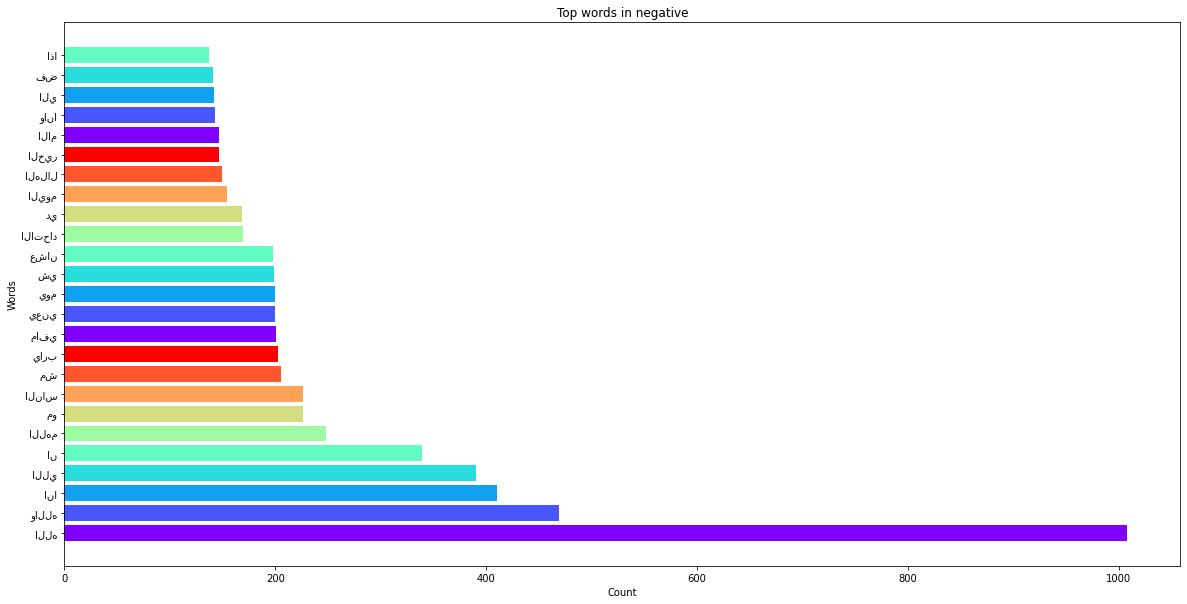

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in negative')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

# Combining the positive and negative classes and tweets text

In [ ]:
final_data = pd.concat([positive, negative], axis=0)

In [ ]:
final_data.head()

,class,tweet_text
0,pos,"[الي, يتابعني, زمان, يعرف, اني, حفزت, الحضور, ..."
1,pos,"[رسميا, اختربت, نومتي]"
2,pos,"[عيونك, وطن, وأكثر, وطن, شد, انتباهي]"
3,pos,"[وحده, تهز]"
4,pos,"[شهور, الله, يهديك, حليمه, تحطين, قلوب, صفراء,..."


In [ ]:
print(len(final_data))

20000


In [ ]:
print(final_data)

     class                                         tweet_text
0      pos  [الي, يتابعني, زمان, يعرف, اني, حفزت, الحضور, ...
1      pos                             [رسميا, اختربت, نومتي]
2      pos              [عيونك, وطن, وأكثر, وطن, شد, انتباهي]
3      pos                                        [وحده, تهز]
4      pos  [شهور, الله, يهديك, حليمه, تحطين, قلوب, صفراء,...
...    ...                                                ...
9995   neg  [افا, اخرتها, نردد, نشيد, الاتحاد, طول, عمرنا,...
9996   neg                                             [يارب]
9997   neg  [اخوانا, الله, لسة, مطالبنا, أتحقق, مطلب, عليك...
9998   neg  [HutrxHutr, اللي, قدر, يتخطى, المقطع, يعلمني, ...
9999   neg                             [عشان, لونها, برتقالي]

[20000 rows x 2 columns]


# Features Extraction from tweets text with TFIDF unigram

In [ ]:
# TfidfVectorizer : Convert a collection of raw documents to a matrix of TF-IDF features.
# tf-idf means term-frequency times inverse document-frequency. 

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features =10000)

unigramdataGet= word_vectorizer.fit_transform(final_data['tweet_text'].astype('str'))
unigramdataGet = unigramdataGet.toarray()

vocab = word_vectorizer.get_feature_names()
unigramdata_features=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
print('posيعرف',unigramdata_features['يعرف'])
print("_____________________________________________")
print('posزمان',unigramdata_features['زمان'])
print("_____________________________________________")
print('نومتي',unigramdata_features['نومتي'])
print("_____________________________________________")
print('الاتحادneg',unigramdata_features['الاتحاد'])

unigramdata_features[unigramdata_features>0] = 1
print("_____________________________________________")

# unigramdata_features.to_csv("/bin/gggggggggggggggggggggg/unigramdata_features.csv")

posيعرف 0        0.3
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19995    0.0
19996    0.0
19997    0.0
19998    0.0
19999    0.0
Name: يعرف, Length: 20000, dtype: float64
_____________________________________________
posزمان 0        0.3
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19995    0.0
19996    0.0
19997    0.0
19998    0.0
19999    0.0
Name: زمان, Length: 20000, dtype: float64
_____________________________________________
نومتي 0        0.0
1        0.7
2        0.0
3        0.0
4        0.0
        ... 
19995    0.0
19996    0.0
19997    0.0
19998    0.0
19999    0.0
Name: نومتي, Length: 20000, dtype: float64
_____________________________________________
الاتحادneg 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19995    0.2
19996    0.0
19997    0.0
19998    0.0
19999    0.0
Name: الاتحاد, Length: 20000, dtype: float64
_____________________________________________


In [ ]:

unigramdata_features

,00,08,12,16,18,1953,2019,27,40,413,419,50,54,__,_نفسك,_گم,alexaplay,alria,am,amp,at,bautifulgoodby1stwi,blackpinkcoachella_d1,blackpinkxcachella_d1,boy,boywithluv70m,bts,bx,by,bywithluv50m,carisma,chensolo1stwi,chips,cia,cntrl,cofidt,cofusd,dm,f16,fifa,...,يوفقه,يوقف,يولد,يولم,يوم,يوم_الجمعة,يوم_الجمعه,يوما,يومك,يومكم,يومنا,يومه,يومي,يومين,يونايتد,يونق,يوه,يوو,يووه,٥٠,ٱن,ٱني,ٲليس,ٳاحد,ٳنك,چذب,چني,ڪريم,ڪل,ڪلما,ڪن,گل,گلبي,گلنا,گم,گن,ھادي,ۈل,یبقی,ᅠᅠ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#encoding class as 1 for Postive class and 0 for negative class
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(final_data['class'])
final_data['class'] = encpro

In [ ]:
#By getting features and Class
y=final_data['class']
X=unigramdata_features

In [ ]:
#Spliting Dataset into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

# --------Trainig and Testing with Machine Learning Algorithms ----------------

In [ ]:
nb=GaussianNB()
nb= nb.fit(X_train , y_train)
nb

GaussianNB()

#### Gaussian

In [ ]:
y_pred = nb.predict(X_test)
nb_1=nb.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(nb.score(X_test, y_test)))

Accuracy= 0.708


In [ ]:
print('Precision',round(f1_score(y_test, y_pred),2),'%')

Precision 0.64 %


In [ ]:
print('Recall',round(recall_score(y_test, y_pred),2),'%')

Recall 0.52 %


In [ ]:
rf_f1=round(f1_score(y_test, y_pred),2)
print('F1',round(f1_score(y_test, y_pred),2),'%')

F1 0.64 %


# LogisticRegression Algorithm

In [ ]:
LR= LogisticRegression(penalty = 'l2', C = 1)
LR= LR.fit(X_train , y_train)
LR

LogisticRegression(C=1)

In [ ]:
y_pred = LR.predict(X_test)
lr_1=LR.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy= 0.747


In [ ]:
print('Precision',round(f1_score(y_test, y_pred),2),'%')

Precision 0.73 %


In [ ]:
print('Recall',round(recall_score(y_test, y_pred),2),'%')

Recall 0.7 %


In [ ]:
rf_f1=round(f1_score(y_test, y_pred),2)
print('F1',round(f1_score(y_test, y_pred),2),'%')

F1 0.73 %


# Comparison of all algorithms Results

In [ ]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms on F1 score")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Naive Bayes Algorithm", round(nb_1,2)])
x.add_row(["Logistic Regression Algorithm", round(lr_1,2)])

print(x)
print('\n')



Comparison of all algorithms on F1 score
+-------------------------------+----------+
|             Model             | Accuracy |
+-------------------------------+----------+
|     Naive Bayes Algorithm     |   0.71   |
| Logistic Regression Algorithm |   0.75   |
+-------------------------------+----------+




In [ ]:
RC =LogisticRegression(penalty = 'l2', C = 1)
RC.fit(X,y)

LogisticRegression(C=1)

# Prediction on sample text

In [ ]:
tv=['🍂حقا 🍂وصدقا 🍂ويقينا 🍂 الله اكبر الله اكبر 🍂 أشهد أن لا إله إلا الله 🍂 أشهد أن محمد رسول الله 🍂…']

In [ ]:
x = word_vectorizer.transform(tv)

In [ ]:
pred=RC.predict(x)
pred=pro.inverse_transform(pred)
prediction=pd.DataFrame(pred, columns=['Prediction']) 
print (prediction)

  Prediction
0        pos


# Showing prediction with tweet text

In [ ]:
result=pd.DataFrame()
result['Text']=tv
result['Prediction']=prediction
result

,Text,Prediction
0,🍂حقا 🍂وصدقا 🍂ويقينا 🍂 الله اكبر الله اكبر 🍂 أش...,pos
